In [58]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from qs_mps.utils import get_precision, swap_columns

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plot Energies for 1D phase spaces

There are two methods:
1. choose a point in the phase space, e.g. the critical point $h_{crit}$: plot energy density for different $\chi$
2. for each point in the phase space $h$: plot the cumulative sum of the energy density for different $\chi$ 

### 1. Specific point plot

In [50]:
model = "Z2_dual"
path = "mac"
L = 5
l = 4
npoints = 50
chis = [16, 32, 64, 128]
hx_i = 1.0
hx_f = -3.0
interval = np.logspace(hx_i, hx_f, npoints)
num = (hx_f - hx_i) / npoints
precision = get_precision(num)

if model == "Ising":
    model_path = "0_ISING"

elif model == "Z2_dual":
    model_path = "1_Z2"
    param_label = "h"

elif model == "ANNNI":
    model_path = "2_ANNNI"

elif model == "Cluster":
    model_path = "3_CLUSTER"
else:
    raise SyntaxError("Model not valid. Choose among 'Ising', 'Z2', 'ANNNI', 'Cluster'")
# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
if path == "pc":
    parent_path = f"G:/My Drive/projects/{model_path}"
    path_tensor = f"D:/code/projects/{model_path}"
    path_rdms = "C:/Users/HP/Desktop/fidelity-phase-tran"
elif path == "mac":
    parent_path = f"/Users/fradm98/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm98/Desktop/projects/{model_path}"
    path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
elif path == "marcos":
    parent_path = f"/Users/fradm/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm/Desktop/projects/{model_path}"

In [51]:
interval
target_param = 0.596

In [55]:
en_dens = []
for chi in chis:
    energies = np.load(f"{parent_path}/results/energy_data/energies_{model}_direct_lattice_{L-1}x{l}_vacuum_sector_None-None_{param_label}_{hx_i}-{hx_f}_delta_{npoints}_chi_{chi}.npy")
    energies = energies.reshape((npoints,energies.shape[-1]))
    # /Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/energy_data/energy_Z2_dual_direct_lattice_4x4_vacuum_sector_None-None_h_1.0--3.0_delta_50_chi_128.npy
    # Flag to track if the target tuple is found
    found = False

    # Iterate through the list of parameters
    for index, param in enumerate(interval):
        # Check if the current parameter matches the target tuple
        if round(param,3) == target_param:
            found = True
            break

    # If the target tuple is not found
    if not found:
        print(f"The tuple {target_param} is not in the parameter list.")

    en_dens_chi = np.abs(energies[index,-1] - energies[index])/L
    en_dens.append(en_dens_chi)

(50, 6)
(50, 6)
(50, 6)
(50, 6)


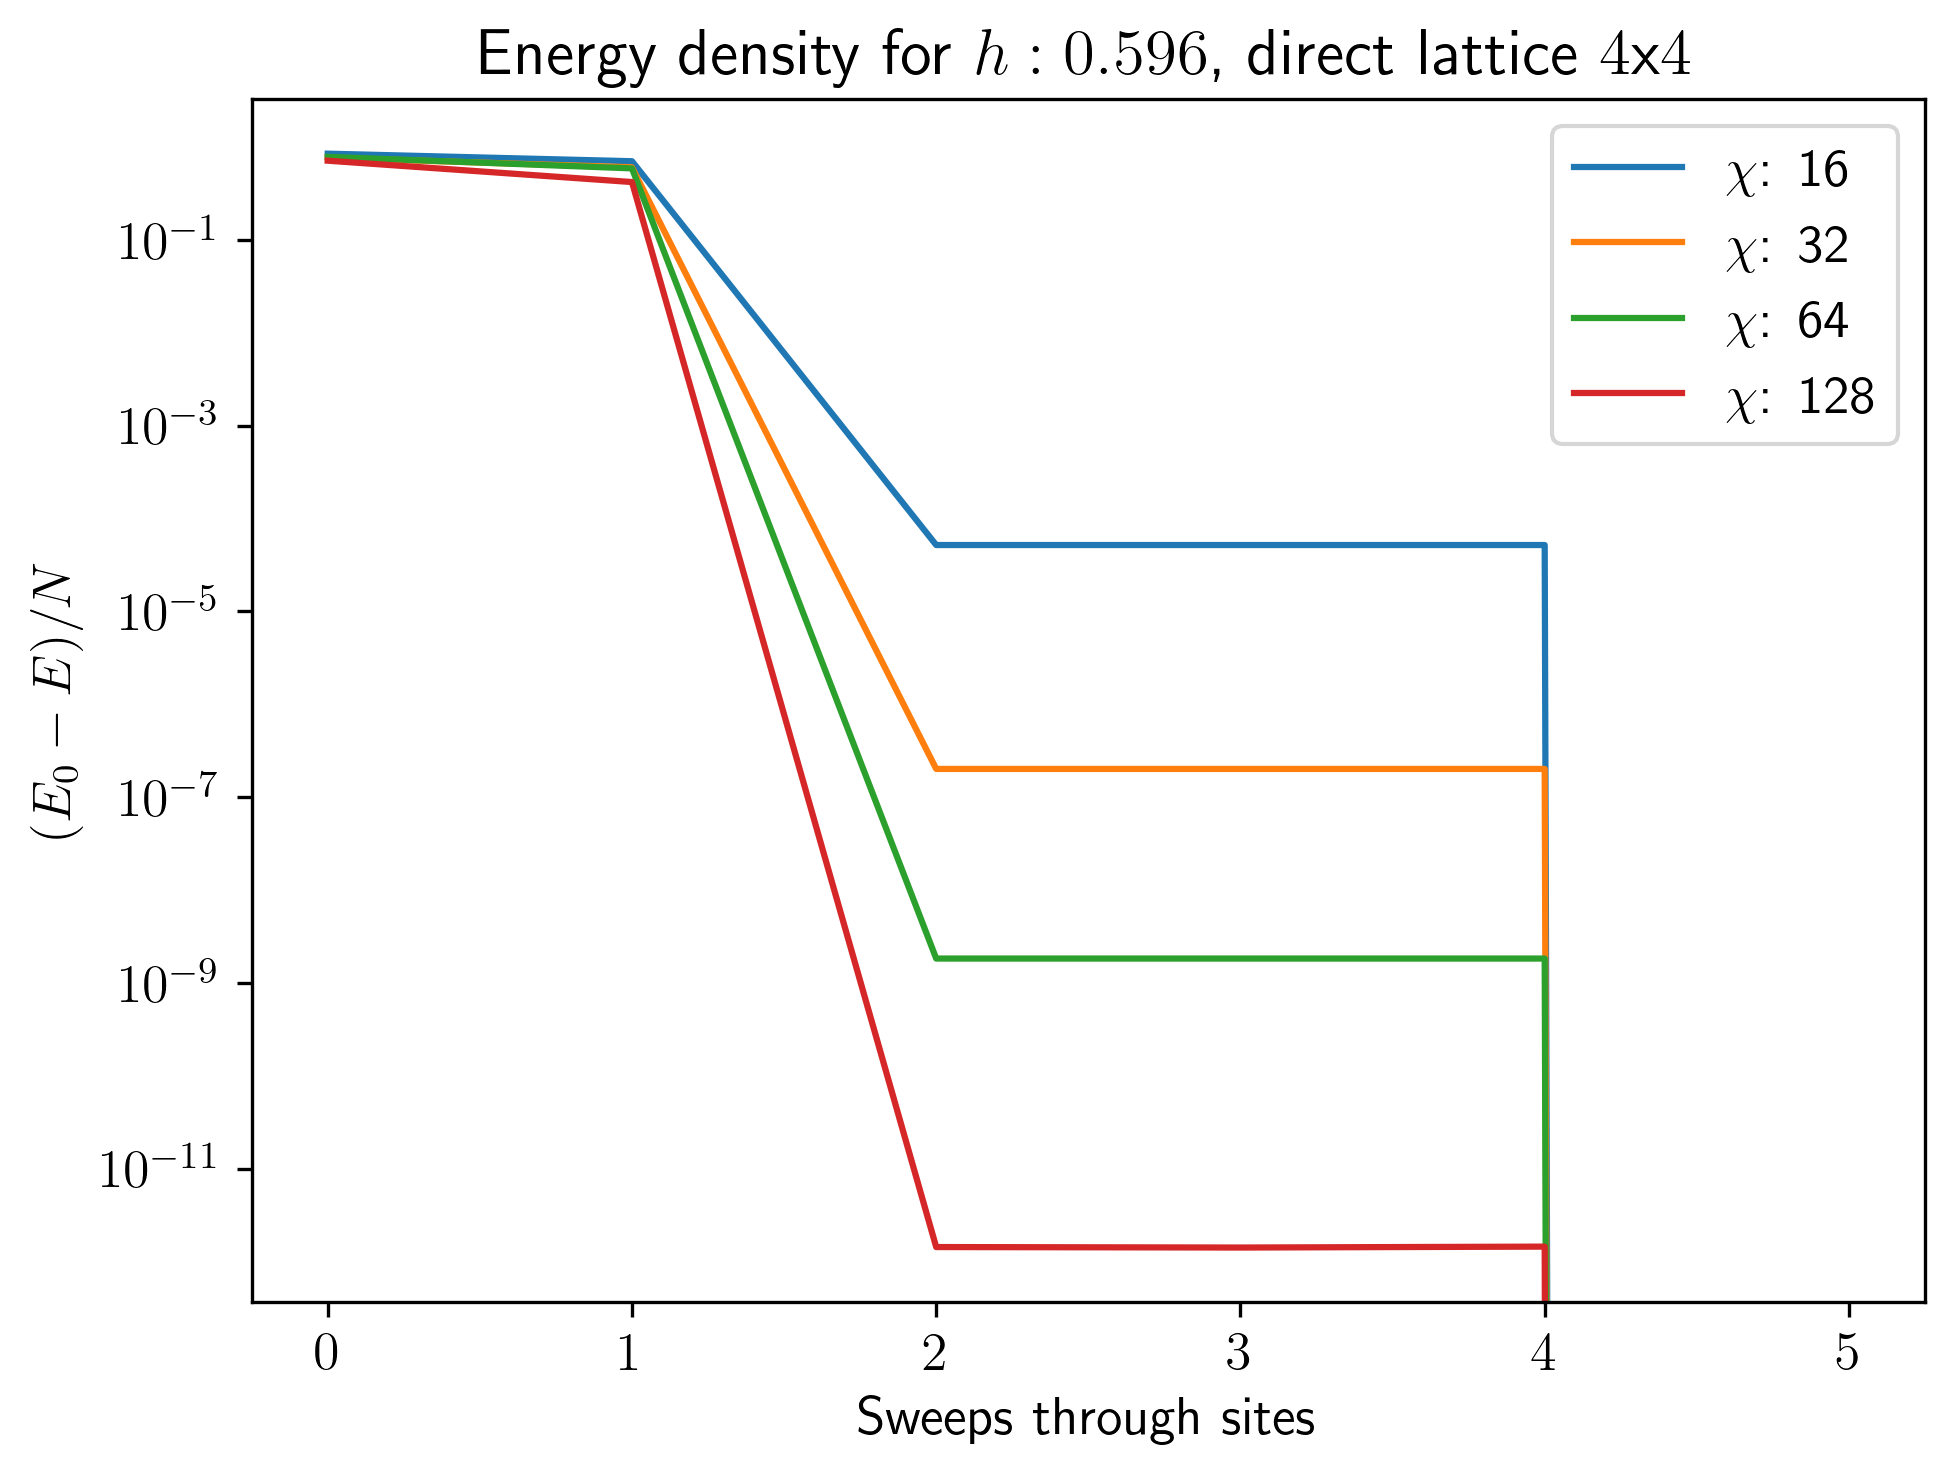

In [60]:
for i, ed in enumerate(en_dens):
    plt.plot(ed, label=f"$\chi$: {chis[i]}")
plt.legend()
plt.title(f"Energy density for ${param_label}:{target_param}$, direct lattice ${l}$x${L-1}$")
plt.ylabel("$(E_0 - E)/N$")
plt.xlabel("Sweeps through sites")
plt.yscale('log')
plt.show()

## Plot Energies for 2D phase spaces

There are two methods:
1. choose a point in the phase space, e.g. the critical point $h_{crit}$: plot energy density for different $\chi$
2. for each point in the phase space $h$: plot the cumulative sum of the energy density for different $\chi$ 

### 1. Specific point plot

In [22]:
model = "ANNNI"
path = "mac"
L = 12
npoints = 16
chis = [4, 16, 64]
hx_i = 0.01
hx_f = 1.5
hy_i = 0.01
hy_f = 1.5
hxs = np.linspace(hx_i, hx_f, npoints)
hys = np.linspace(hy_i, hy_f, npoints)
num = (hx_f - hx_i) / npoints
precision = get_precision(num)

if model == "Ising":
    model_path = "0_ISING"
    param_labels = ["h","J"]

elif model == "Z2":
    model_path = "1_Z2"
    param_labels = ["g","J"]

elif model == "ANNNI":
    model_path = "2_ANNNI"
    param_labels = ["k","h"]

elif model == "Cluster":
    model_path = "3_CLUSTER"
    param_labels = ["h","J"]
else:
    raise SyntaxError("Model not valid. Choose among 'Ising', 'Z2', 'ANNNI', 'Cluster'")
# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
if path == "pc":
    parent_path = f"G:/My Drive/projects/{model_path}"
    path_tensor = f"D:/code/projects/{model_path}"
    path_rdms = "C:/Users/HP/Desktop/fidelity-phase-tran"
elif path == "mac":
    parent_path = f"/Users/fradm98/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm98/Desktop/projects/{model_path}"
    path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
elif path == "marcos":
    parent_path = f"/Users/fradm/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm/Desktop/projects/{model_path}"

In [23]:
target_param = [0.51,0.51]
params = [[round(hx,precision),round(hy,precision)] for hy in hys for hx in hxs]
print(params)

[[0.01, 0.01], [0.11, 0.01], [0.21, 0.01], [0.31, 0.01], [0.41, 0.01], [0.51, 0.01], [0.61, 0.01], [0.71, 0.01], [0.8, 0.01], [0.9, 0.01], [1.0, 0.01], [1.1, 0.01], [1.2, 0.01], [1.3, 0.01], [1.4, 0.01], [1.5, 0.01], [0.01, 0.11], [0.11, 0.11], [0.21, 0.11], [0.31, 0.11], [0.41, 0.11], [0.51, 0.11], [0.61, 0.11], [0.71, 0.11], [0.8, 0.11], [0.9, 0.11], [1.0, 0.11], [1.1, 0.11], [1.2, 0.11], [1.3, 0.11], [1.4, 0.11], [1.5, 0.11], [0.01, 0.21], [0.11, 0.21], [0.21, 0.21], [0.31, 0.21], [0.41, 0.21], [0.51, 0.21], [0.61, 0.21], [0.71, 0.21], [0.8, 0.21], [0.9, 0.21], [1.0, 0.21], [1.1, 0.21], [1.2, 0.21], [1.3, 0.21], [1.4, 0.21], [1.5, 0.21], [0.01, 0.31], [0.11, 0.31], [0.21, 0.31], [0.31, 0.31], [0.41, 0.31], [0.51, 0.31], [0.61, 0.31], [0.71, 0.31], [0.8, 0.31], [0.9, 0.31], [1.0, 0.31], [1.1, 0.31], [1.2, 0.31], [1.3, 0.31], [1.4, 0.31], [1.5, 0.31], [0.01, 0.41], [0.11, 0.41], [0.21, 0.41], [0.31, 0.41], [0.41, 0.41], [0.51, 0.41], [0.61, 0.41], [0.71, 0.41], [0.8, 0.41], [0.9, 0.41

In [24]:
en_dens = []
for chi in chis:
    energies = np.load(f"{parent_path}/results/energy_data/energies_{model}_L_{L}_{param_labels[0]}_{hx_i}-{hx_f}_{param_labels[1]}_{hy_i}-{hy_f}_delta_{npoints}_chi_{chi}.npy")
    energies = energies.reshape((npoints*npoints,energies.shape[-1]))

    # Flag to track if the target tuple is found
    found = False

    # Iterate through the list of parameters
    for index, param in enumerate(params):
        # Check if the current parameter matches the target tuple
        if param == target_param:
            found = True
            break

    # If the target tuple is not found
    if not found:
        print(f"The tuple {target_param} is not in the parameter list.")

    en_dens_chi = np.abs(energies[index,-1] - energies[index])/L
    en_dens.append(en_dens_chi)

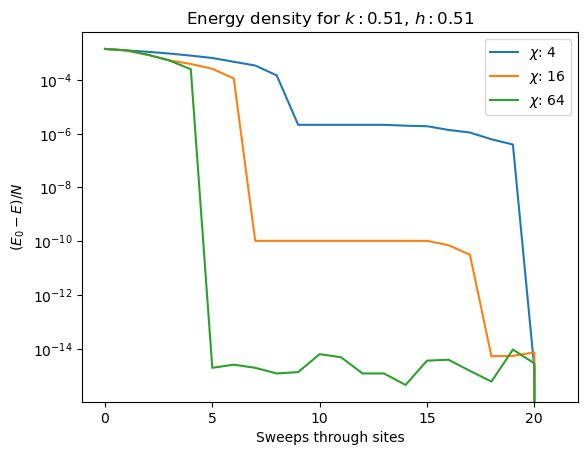

In [25]:
for i, ed in enumerate(en_dens):
    plt.plot(ed, label=f"$\chi$: {chis[i]}")
plt.legend()
plt.title(f"Energy density for ${param_labels[0]}:{target_param[0]}$, ${param_labels[1]}:{target_param[1]}$")
plt.ylabel("$(E_0 - E)/N$")
plt.xlabel("Sweeps through sites")
plt.yscale('log')
plt.show()

### 2. All points plot

In [26]:
model = "Cluster"
path = "mac"
L = 12
npoints = 16
chis = [2]
hx_i = 0.01
hx_f = 1.5
hy_i = 0.01
hy_f = 1.5
hxs = np.linspace(hx_i, hx_f, npoints)
hys = np.linspace(hy_i, hy_f, npoints)
num = (hx_f - hx_i) / npoints
precision = get_precision(num)

if model == "Ising":
    model_path = "0_ISING"
    param_labels = ["h","J"]

elif model == "Z2":
    model_path = "1_Z2"
    param_labels = ["g","J"]

elif model == "ANNNI":
    model_path = "2_ANNNI"
    param_labels = ["k","h"]

elif model == "Cluster":
    model_path = "3_CLUSTER"
    param_labels = ["h","J"]
else:
    raise SyntaxError("Model not valid. Choose among 'Ising', 'Z2', 'ANNNI', 'Cluster'")
# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
if path == "pc":
    parent_path = f"G:/My Drive/projects/{model_path}"
    path_tensor = f"D:/code/projects/{model_path}"
    path_rdms = "C:/Users/HP/Desktop/fidelity-phase-tran"
elif path == "mac":
    parent_path = f"/Users/fradm98/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm98/Desktop/projects/{model_path}"
    path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
elif path == "marcos":
    parent_path = f"/Users/fradm/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm/Desktop/projects/{model_path}"

In [27]:
en_dens = []
for chi in chis:
    energies = np.load(f"{parent_path}/results/energy_data/energies_{model}_L_{L}_{param_labels[0]}_{hx_i}-{hx_f}_{param_labels[1]}_{hy_i}-{hy_f}_delta_{npoints}_chi_{chi}.npy")
    
    en_dens_chi = [np.abs(energies[i,j,-1] - energies[i,j]) for j,hy in enumerate(hys) for i,hx in enumerate(hxs)]
    en_dens_chi = np.asarray(en_dens_chi)
    # en_dens_chi = np.mean(en_dens_chi, axis=-1)
    # en_dens_chi_std = np.std(en_dens_chi, axis=-1)
    en_dens_chi = np.sum(en_dens_chi, axis=-1)
    en_dens_chi = en_dens_chi.reshape((npoints,npoints))
    en_dens.append(en_dens_chi)

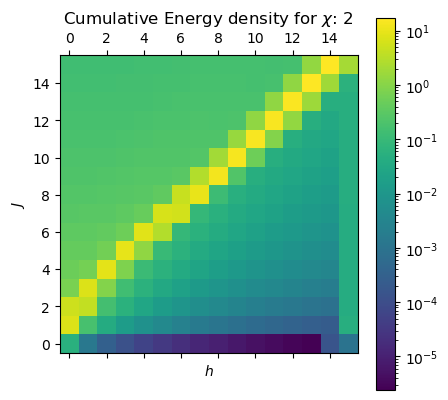

In [61]:
for i, ed in enumerate(en_dens):
    # end = []
    # for e in ed:
    #     e = e[::-1]
    #     end.append(e)
    # end = np.asarray(end[::-1]).T
    plt.matshow(ed, origin='lower', norm=colors.LogNorm(vmin=np.min(ed)+1e-15, vmax=np.max(ed)))
    # plt.matshow(end, origin='lower', norm=colors.LogNorm(
    #                                           vmin=np.min(ed)+1e-15, vmax=np.max(ed)))
    plt.title(f"Cumulative Energy density for $\chi$: {chis[i]}")
    plt.ylabel(f"${param_labels[1]}$")
    plt.xlabel(f"${param_labels[0]}$")
    plt.colorbar()
plt.show()